<h1 align="center">MULTIPLE REGRESSION WITH STATSMODELS</h1>

- [**Detecting Collinearity with Eigenvectors**](#eigen)
- [**Testing for Multicollinearity**](#multi)
- [**Residuals & Residual Plots**](#resplot)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

<a id='stat'></a>
## Regression with Statsmodels

In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

In [4]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = np.log(df['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=10)

In [5]:
# sm.OLS?

In [6]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})
# 't-stat': results.tvalues

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          1.70e-124
Time:                        14:32:46   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.000       3.614       4.506
CRIM          -0.0107      0.001     -7.971      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.641      0.009       0.000       0.003
INDUS          0.0020      0.003      0.765      0.445      -0.003       0.007
CHAS           0.0803      0.039      2.079      0.038       0.004       0.156
NOX           -0.7041      0.166     -4.245      0.000      -1.030      -0.378
RM             0.0734      0.019      3.910      0.000       0.036       0.110
AGE            0.0008      0.001      1.258      0.209      -0.000       0.002
DIS           -0.0476      0.009     -5.313      0.000      -0.065      -0.030
RAD            0.0146      0.003      5.170      0.000       0.009       0.020
TAX           -0.0006      0.000     -4.095      0.000      -0.001      -0.000
PTRATIO       -0.0348      0.006     -5.908      0.000      -0.046      -0.023
B              0.0005      0.000      4.578      0.000       0.000       0.001
LSTAT         -0.0314      0.002    -14.213      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.711   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.952
Skew:                           0.093   Prob(JB):                     9.84e-24
Kurtosis:                       5.502   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

| **Variable** | **Description** |
| :- | :-: |
| **Dep. Variable** | Dependent variable or target variable. |
| **Model / Method** | Method used to fit the data to the model. |
| **No. Observations** | Number of observations. |
| **DF Residuals** | Degrees of freedom of the residuals. Calculated by taking the <br>number of observations less the number of parameters.|
| **DF Model** | Number of estimated parameters in the model.<br>In this case 13. The constant term is not included. |
| **R-squared** | Coefficient of determination. Measure of goodness of fit.<br>$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$ |
| **Adj. R-squared** | Coefficient of determination adjusted by sample size and the number of parameters used.<br> $$\bar{R}^2=1-(1-R^2)\frac{n-1}{n-p-1}$$<br>$p$ = The total number of explanatory variables not including the constant term<br>$n$ = The sample size|
| **F-statistic** | Measure that tells you if the model is different from a simple average. |
| **Prob (F-statistic)** | Measures the significance of your F-statistic. Also called p-value of F-statistic. In statistics, p-value equal or lower than 0.05 is considered significant. |
| **AIC** | Akaike Information Criterion. It evaluates the model based on the model complexity and number of observations. The lower the better. |
| **BIC** | Bayesian Information Criterion. Similar to AIC, except it punishes models with more parameters. |
| **coef** | Estimated coefficient. Note that this is just a point estimate. |
| **std err** | Standard error (or standard deviation) of the estimate of the coefficient. |
| **t** | The t-statistic score. |
| **P > |t|** |  A measure of the probability that the coefficient is different from zero. |
| **[95.0% Conf. Interval]** | The 95% confidence interval of the coefficient. |
| **Omnibus D'Angostino's test** | A combined statistical test for skewness and kurtosis. |
| **Prob(Omnibus)** | p-value of Omnibus test. |
| **Skewness** | Measure of the symmetry of the residuals around the mean. Zero if symmetrical. A positive value indicates a long tail to the right; a negative value a long tail to the left. |
| **Kurtosis** | Measure of the shape of the distribution of the residuals. A normal distribution has a zero measure. A negative value points to a flatter than normal distribution; a positive one has a higher peak than normal distribution. |
| **Durbin-Watson** | Test for the presence of correlation among the residuals. This is especially important for time series modelling. |
| **Jarque-Bera** | Combined statistical test of skewness and kurtosis. |
| **Prob (JB)** | p-value of Jarque-Bera. |
| **Cond. No** | Test for multicollinearity. > 30 indicates unstable results |

<a id='eigen'></a>
### <u>Detecting Collinearity with Eigenvectors<u/>

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [9]:
pd.options.display.float_format = '{:,.4f}'.format
pd.Series(eigenvalues).sort_values()

8    0.0603
9    0.1340
12   0.1830
13   0.2128
11   0.2523
10   0.2773
7    0.4031
6    0.5354
5    0.6600
4    0.8509
3    0.8865
2    1.3489
1    1.6495
0    6.5460
dtype: float64

Note that index 8, eigenvalue of 0.0603, is near to zero or very small compared to the others. Small value represents presence of collinearity. 

In [10]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.6988
8    0.6350
2    0.2355
13   0.1341
1    0.0963
4    0.0876
12   0.0831
0    0.0591
10   0.0557
7    0.0471
6    0.0382
3    0.0235
11   0.0162
5    0.0072
dtype: float64

Note that index 9, 8, 2 have very high loading when compared against the rest

In [11]:
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


These are the factors that are causing multicollinearity problem.

In [12]:
def eigens(features):
    eigenvalues, eigenvectors = np.linalg.eig(features.corr())
    
    pd.options.display.float_format = '{:,.4f}'.format
    sorted_eigen = pd.Series(eigenvalues).sort_values()
    sorted_vector = np.abs(pd.Series(eigenvectors)).sort_values(ascending=False)
    return sorted_eigen, sorted_vector

<a id='multi'></a>
### <u>Testing for Multicollinearity<u/>

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [13]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)
#type(X_incl_const)

1.7145250443932485

In [14]:
# Challenge: print out the number of columns in X_incl_const
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [15]:
# Challenge: write a for loop that prints out all the VIFs for all the features
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print('All done!')

597.5487126763895
1.7145250443932485
2.3328224265597597
3.943448822674636
1.0788133385000576
4.410320817897635
1.8404053075678573
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514058
1.338671325536472
2.812544292793036
All done!


In [16]:
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674636, 1.0788133385000576, 4.410320817897635, 1.8404053075678573, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.338671325536472, 2.812544292793036]


In [17]:
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)}).set_index('coef_name')

,vif
coef_name,
const,597.5500
CRIM,1.7100
ZN,2.3300
INDUS,3.9400
CHAS,1.0800
NOX,4.4100
RM,1.8400
AGE,3.3300
DIS,4.2200


## Model Simplification & the BIC

In [18]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Challenge: find and check official docs for results object and print out BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478898
r-squared is 0.7930234826697584


In [19]:
# Reduced model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [20]:
# Reduced model #2 excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -149.49934294224678
r-squared is 0.7918657661852815


In [21]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.0599,0.0000,4.0562,0.0000,4.0359,0.0000
CRIM,-0.0107,0.0000,-0.0107,0.0000,-0.0107,0.0000
ZN,0.0016,0.0090,0.0016,0.0100,0.0015,0.0140
INDUS,0.0020,0.4450,nan,nan,nan,nan
CHAS,0.0803,0.0380,0.0828,0.0320,0.0864,0.0250
NOX,-0.7041,0.0000,-0.6734,0.0000,-0.6164,0.0000
RM,0.0734,0.0000,0.0717,0.0000,0.0761,0.0000
AGE,0.0008,0.2090,0.0008,0.2070,nan,nan
DIS,-0.0476,0.0000,-0.0494,0.0000,-0.0527,0.0000
RAD,0.0146,0.0000,0.0140,0.0000,0.0137,0.0000


<a id='resplot'></a>
### <u>Residuals & Residual Plots<u/>

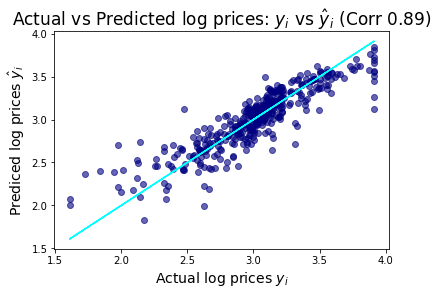

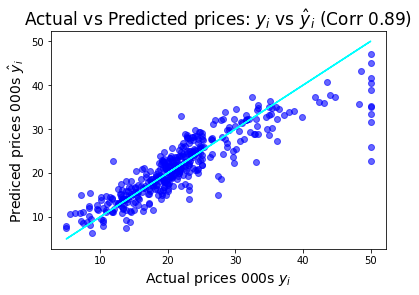

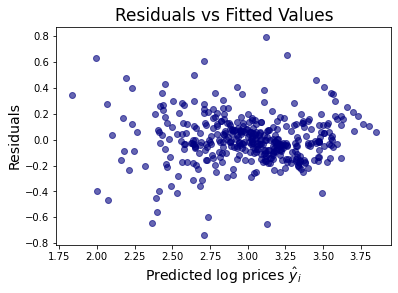

In [22]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(df['MEDV']) # Use log prices
features = df.drop(['MEDV', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# residuals.describe()
# results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

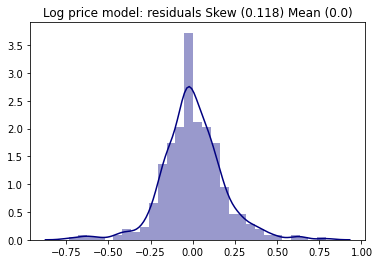

In [23]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [24]:
# Challenge: Using the original model with all the features and normal prices generate:
# Plot of actual vs predicted prices (incl. correlation) using a different colour
# Plot of residuals vs. predicted prices
# Plot of distribution of residuals (incl. skew)
# Analyse the results. 

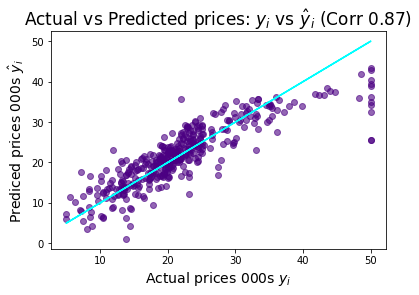

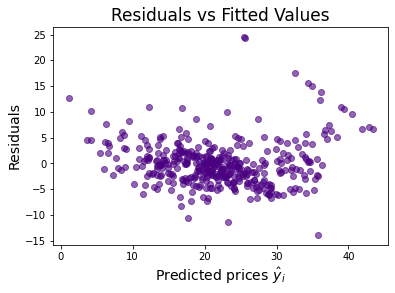

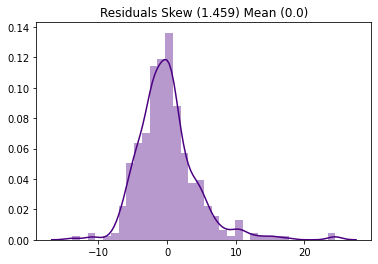

In [25]:
# Original model: normal prices & all features
prices = df['MEDV']
features =df.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

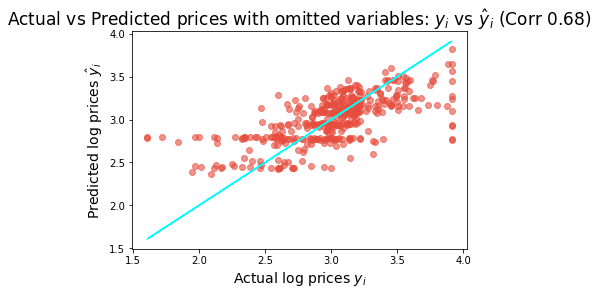

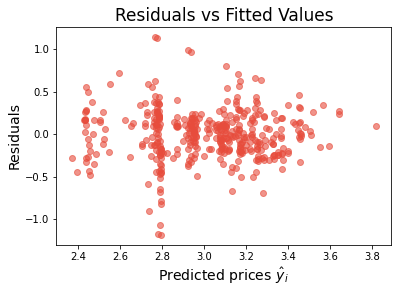

In [26]:
# Model Omitting Key Features using log prices
prices = np.log(df['MEDV'])
features = df.drop(['MEDV', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [27]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

# the MSE cannot be compared because they are on different scales and different units

,R-Squared,MSE,RMSE
Reduced Log Model,0.7920,0.0350,0.1871
Full Normal Price Model,0.7500,19.9210,4.4633
Omitted Var Model,0.4600,0.0900,0.3000


**The Root Mean Squared Error also represents one standard deviation of the differences between our actual and our predicted values.**

In [28]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


In [29]:
np.std(results.resid)

0.29630602897644215

In [30]:
results.resid.std()

0.2966734265496503

In [31]:
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 # Wrong! Add first. Transform afterwards. 

31453.778077746647

# statsmodels.formula.api

In [32]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
mlr = form_lr.fit()

In [33]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          4.07e-157
Time:                        14:32:49   Log-Likelihood:                 129.61
No. Observations:                 506   AIC:                            -231.2
Df Residuals:                     492   BIC:                            -172.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1020      0.204     20.081      0.000       3.701       4.503
CRIM          -0.0103      0.001     -7.808      0.000      -0.013      -0.008
ZN             0.0012      0.001      2.134      0.033    9.29e-05       0.002
INDUS          0.0025      0.002      1.002      0.317      -0.002       0.007
CHAS           0.1009      0.034      2.925      0.004       0.033       0.169
NOX           -0.7784      0.153     -5.091      0.000      -1.079      -0.478
RM             0.0908      0.017      5.430      0.000       0.058       0.124
AGE            0.0002      0.001      0.398      0.691      -0.001       0.001
DIS           -0.0491      0.008     -6.149      0.000      -0.065      -0.033
RAD            0.0143      0.003      5.373      0.000       0.009       0.019
TAX           -0.0006      0.000     -4.157      0.000      -0.001      -0.000
PTRATIO       -0.0383      0.005     -7.309      0.000      -0.049      -0.028
B              0.0004      0.000      3.847      0.000       0.000       0.001
LSTAT         -0.0290      0.002    -14.304      0.000      -0.033      -0.025
==============================================================================
Omnibus:                       59.863   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.459
Skew:                           0.466   Prob(JB):                     4.06e-50
Kurtosis:                       6.150   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# removing 'INDUS' & 'AGE' since they are insignificant

form_lr = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          4.31e-159
Time:                        14:32:49   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Exercise

Create a model using the following features

CRIM, ZN, CHAS, NOX

In [35]:
test = ['CRIM', 'ZN', 'CHAS', 'NOX']
'y ~ ' + ' + '.join(test)

'y ~ CRIM + ZN + CHAS + NOX'

In [36]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX', 
              data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     92.19
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.05e-58
Time:                        14:32:49   Log-Likelihood:                -125.24
No. Observations:                 506   AIC:                             260.5
Df Residuals:                     501   BIC:                             281.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6347      0.087     41.793      0.000       3.464       3.806
CRIM          -0.0173      0.002     -9.674      0.000      -0.021      -0.014
ZN             0.0025      0.001      3.615      0.000       0.001       0.004
CHAS           0.2760      0.055      5.008      0.000       0.168       0.384
NOX           -1.0552      0.152     -6.946      0.000      -1.354      -0.757
==============================================================================
Omnibus:                       41.212   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.509
Skew:                           0.587   Prob(JB):                     4.40e-14
Kurtosis:                       4.240   Cond. No.                         327.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Use $R^2$ to Identify Key Features

* Compare $R^2$ of model against $R^2$ of model without a feature. 

* A significant change in $R^2$ signify the importance of the feature.




In [37]:
from sklearn.metrics import r2_score

In [38]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.789640732793439

without LSTAT

In [39]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', 
              data=df)
lr_without_LSTAT = linear_reg.fit()
r2_score(y, lr_without_LSTAT.predict(df))

0.7021650842054399

without AGE

In [40]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
lr_without_AGE = linear_reg.fit()
r2_score(y, lr_without_AGE.predict(df))

0.7895728965889132

In [41]:
# We can see that LSTAT is more useful than AGE